In [1]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2


# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

In [2]:
import random
import numpy as np

import matplotlib.pyplot as plt
import time
import pickle
import os
from collections import Counter
from skimage.transform import rescale, resize
from PIL import Image
from tensorflow.keras.utils import to_categorical
import sklearn as sk
from sklearn import preprocessing
import scipy.ndimage as s
import warnings
warnings.filterwarnings('ignore')

In [18]:
np.concatenate(([0],[1,2,3]), axis = 0)

array([0, 1, 2, 3])

In [3]:
import csv
X_encode = []
target = []
with open('pollen_embeddings_retinanet_sigmoid.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        X_encode.append(row[1:])
        target.append(int(float(row[0])))

In [79]:
X_encode

[['0.0',
  '0.004090027883648872',
  '0.0',
  '0.004661054350435734',
  '0.015693146735429764',
  '0.0',
  '0.005727567709982395',
  '0.0',
  '0.011561356484889984',
  '0.007415771484375',
  '0.0',
  '0.01731642335653305',
  '0.0',
  '0.014421923086047173',
  '0.015462477691471577',
  '0.04763273149728775',
  '0.0',
  '0.0',
  '0.02604374662041664',
  '0.016461007297039032',
  '0.0',
  '0.040436096489429474',
  '0.0',
  '0.016712412238121033',
  '0.0',
  '0.003160807304084301',
  '0.01783991977572441',
  '0.011488598771393299',
  '0.012405079789459705',
  '0.0',
  '0.012621330097317696',
  '0.04532112181186676',
  '0.03654789179563522',
  '0.03353942930698395',
  '0.0023773834109306335',
  '0.0142647260800004',
  '0.013677762821316719',
  '0.0',
  '0.0',
  '0.0',
  '0.027028484269976616',
  '0.014301304705440998',
  '0.0',
  '0.030291469767689705',
  '0.0',
  '0.03295207396149635',
  '0.0',
  '0.0',
  '0.02009657397866249',
  '0.02312086522579193',
  '0.020212087780237198',
  '0.0',
  

In [4]:
english_to_latin = [[4,'Salix'],
[6,'Tilia'],
[8,'Alnus'],
[9,'Betula'],
[11,'Urtica'],
[12,'Chenopodiaceae'],
[13,'Plantago'],
[14,'Rumex'],
[15,'Poaceae'],
[16,'Pinus'],
[17,'Acer'],
[18,'Corylus'],
[19,'Artemisia'],
[2, 'Angelica sylvestris'],
[3, 'Angelica archangelica'],
[0, 'Fagopyrum esculentum'],
[5, 'Bunias orientalis'],
[1, 'Trifolium hybridum'],
[7, 'Sabatia campestris'],
[10, 'Chamaenerion angustifolium']]

In [5]:
english_to_latin = np.array(english_to_latin)
english_to_latin = dict(zip(english_to_latin[:,0], english_to_latin[:,1]))

In [6]:
english_to_latin

{'4': 'Salix',
 '6': 'Tilia',
 '8': 'Alnus',
 '9': 'Betula',
 '11': 'Urtica',
 '12': 'Chenopodiaceae',
 '13': 'Plantago',
 '14': 'Rumex',
 '15': 'Poaceae',
 '16': 'Pinus',
 '17': 'Acer',
 '18': 'Corylus',
 '19': 'Artemisia',
 '2': 'Angelica sylvestris',
 '3': 'Angelica archangelica',
 '0': 'Fagopyrum esculentum',
 '5': 'Bunias orientalis',
 '1': 'Trifolium hybridum',
 '7': 'Sabatia campestris',
 '10': 'Chamaenerion angustifolium'}

In [292]:
english_to_latin.key['Artemisia']

AttributeError: 'dict' object has no attribute 'key'

In [7]:
target_new = []
for item in target:
    target_new.append(english_to_latin[str(item)])
target = target_new
target = np.array(target)

In [8]:

cats = np.unique(target)
di = dict(zip(cats,np.arange(len(cats))))

In [102]:
def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return x, y

In [144]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return rho, phi

In [238]:
X_embedded[0]

array([-15.283289,  -4.301177], dtype=float32)

In [239]:
X_embedded[:,0], X_embedded[:,1] = cart2pol(X_embedded[:,0], X_embedded[:,1])

In [240]:
X_embedded[0]

array([15.876997 , -2.8672583], dtype=float32)

In [185]:
X_norm = X_encode
gamma = 0.01
var = 5.0
X_norm = np.sum(X ** 2, axis = -1)
K = var * np.exp(-gamma * (X_norm[:,None] + X_norm[None,:] - 2 * np.dot(X, X.T)))

In [186]:
K = np.array(K)
K.shape

(1801, 1801)

In [9]:
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import rbf_kernel

tsne_model = TSNE(n_components=2,verbose=1, perplexity=40, n_iter=5000, learning_rate=1000)

# X = preprocessing.normalize(X)
X_encode = np.array(X_encode)

X = preprocessing.normalize(X_encode, norm='l2')
# X = np.array(X)
gamma = 0.01
var = 5.0
# X = var * np.exp(-gamma * (X[:,None] + X[None,:] - 2 * np.dot(X_encode, X_encode.T)))
# X = var * rbf_kernel(X_encode, gamma = gamma)

X_embedded = tsne_model.fit_transform(X)
X_embedded.shape

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1751 samples in 0.000s...
[t-SNE] Computed neighbors for 1751 samples in 0.166s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1751
[t-SNE] Computed conditional probabilities for sample 1751 / 1751
[t-SNE] Mean sigma: 0.002013
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.703213
[t-SNE] KL divergence after 5000 iterations: 0.415864


(1751, 2)

In [15]:
indices = [i for i in range(len(X_embedded)) if X_embedded[i,0] < 300]
len(indices)

1800

In [16]:
target = target[indices]

X_embedded = X_embedded[indices]

In [19]:
di.keys()

dict_keys(['Acer', 'Alnus', 'Angelica archangelica', 'Angelica sylvestris', 'Artemisia', 'Betula', 'Bunias orientalis', 'Chamaenerion angustifolium', 'Chenopodiaceae', 'Corylus', 'Fagopyrum esculentum', 'Pinus', 'Plantago', 'Poaceae', 'Rumex', 'Sabatia campestris', 'Salix', 'Tilia', 'Trifolium hybridum', 'Urtica'])

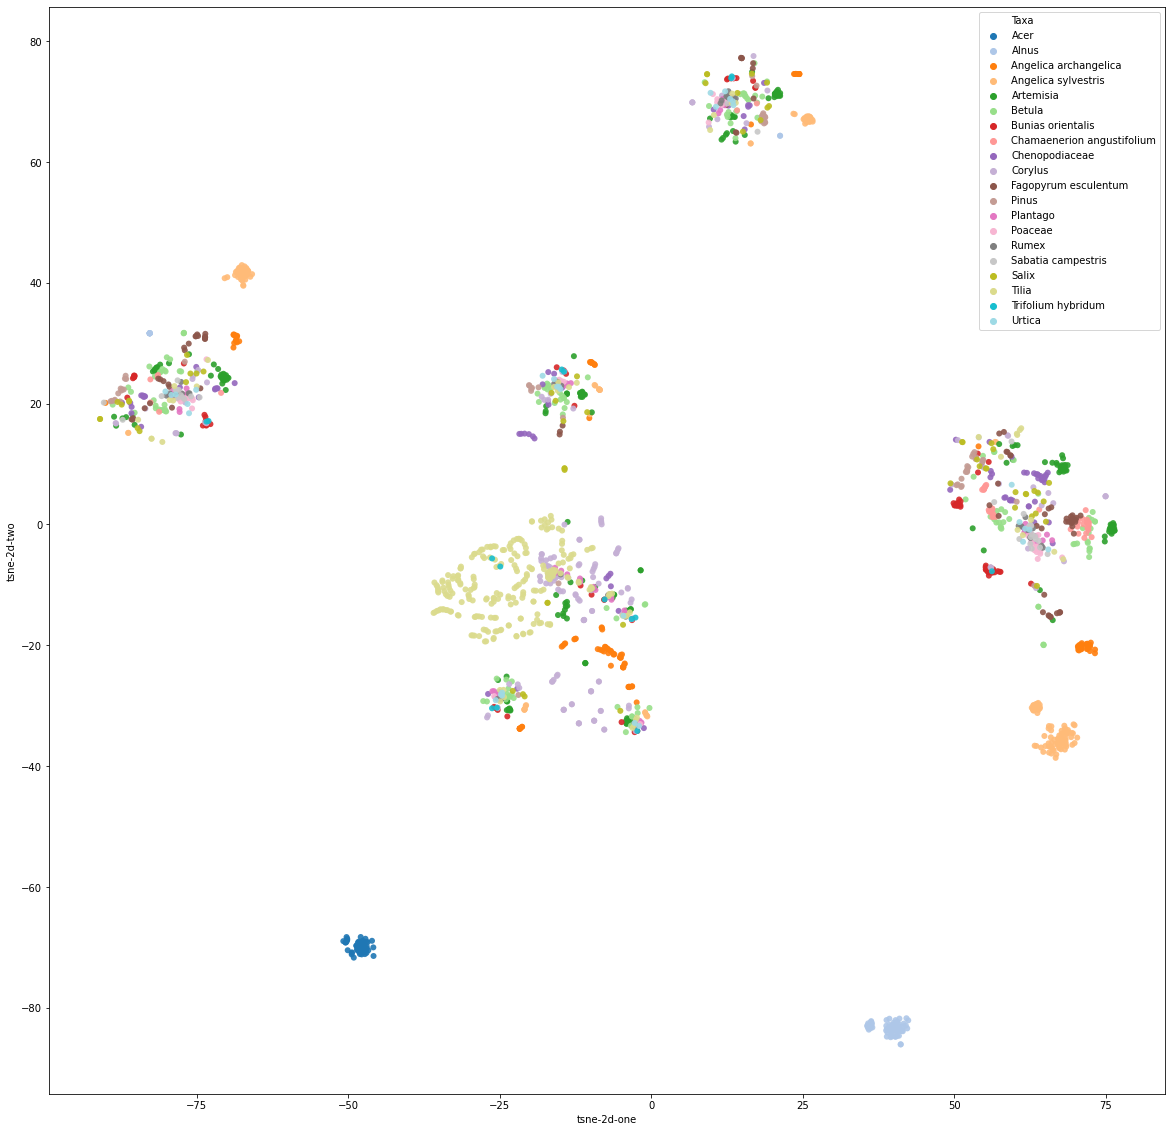

In [27]:
#K-means centroids
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd



N = 0#len(pollen_gan)
feat_cols = [ 'pixel'+str(i) for i in range(X_embedded.shape[1]) ]
plt.figure(figsize=(20,20))

df1 = pd.DataFrame(X_embedded[N:],columns=feat_cols)
df1['y'] = target
# df1['label'] = df1['y'].apply(lambda i: labels[i])#str(i))
df1['tsne-2d-one'] = X_embedded[N:,0]
df1['tsne-2d-two'] = X_embedded[N:,1]

ax = sns.scatterplot( 
    x="tsne-2d-one", y="tsne-2d-two",
        hue="y",
        palette=sns.color_palette("tab20", 20), #nipy_spectral
        data=df1,
        edgecolor='none',
        legend="full",
        alpha=0.9)
labels = list(di.keys())
legend = ax.legend_
# legend(fontsize='x-large', markerscale=2)

legend.get_texts()[0].set_text('Taxa')
for i, label in enumerate(labels):
    # i+1 because i=0 is the title, and i starts at 0
    legend.get_texts()[i+1].set_text(label) 
# plt.show()
# ax.legend(fontsize='x-large', markerscale=2)
plt.savefig('bayesian_sigmoid_test.png', bbox_inches='tight', pad_inches=0)        

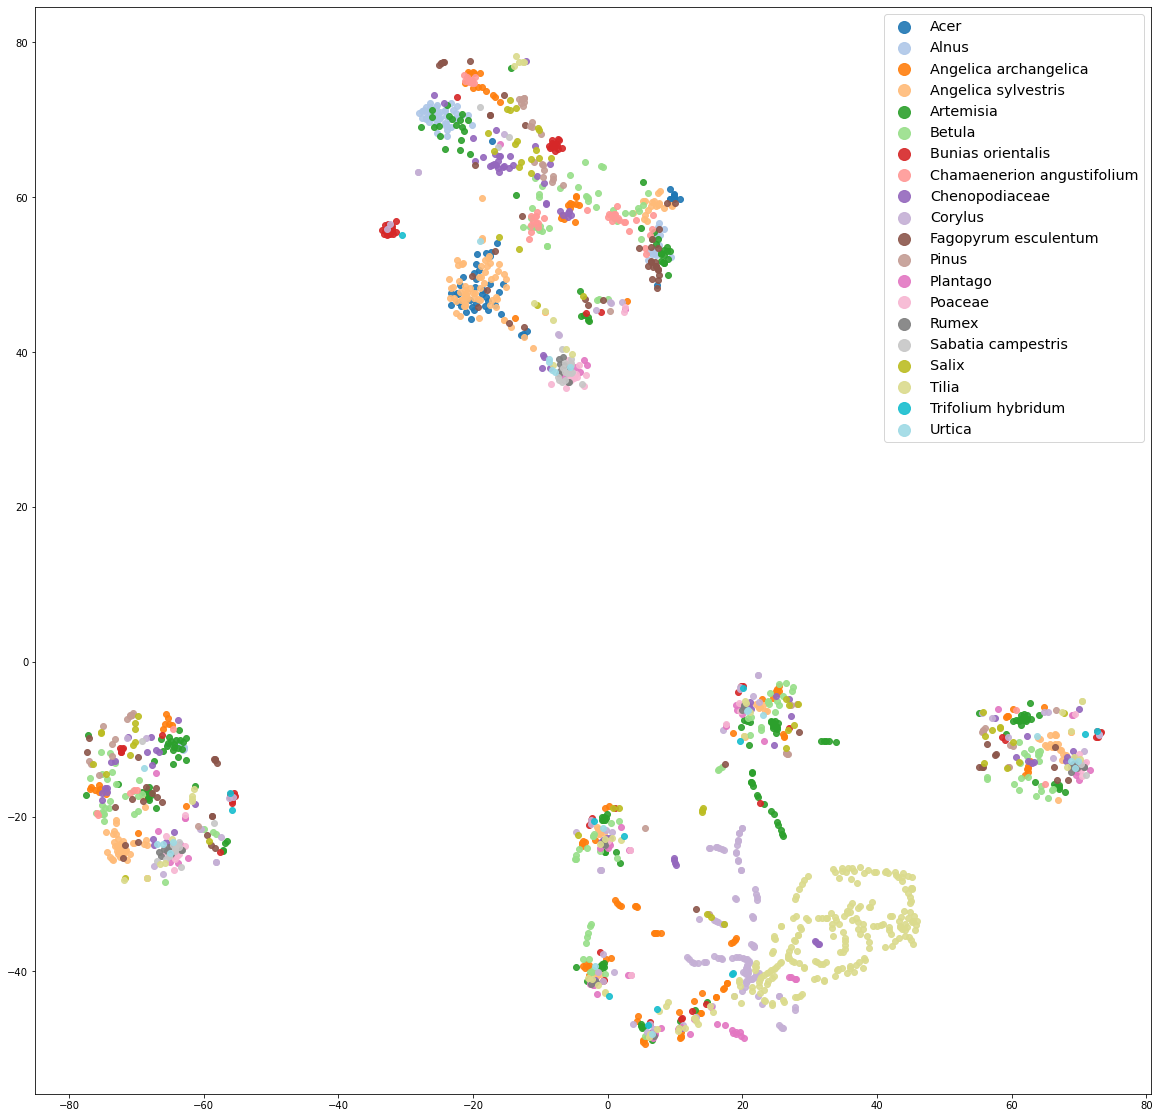

In [10]:
from matplotlib import cm

fig, ax = plt.subplots(figsize=(20,20))

num_categories = 20
cmap = cm.get_cmap('tab20')
# ax.scatter(x, y, z, c=target, cmap='Spectral')
for lab in range(num_categories):
    indices = target==english_to_latin[str(lab)]
    ax.scatter(X_embedded[indices, 0], X_embedded[indices, 1],
               c=np.array(cmap(lab)).reshape(1,4),
               label = cats[lab],
               alpha=0.9, cmap=cmap)
ax.legend(fontsize='x-large', markerscale=2)

plt.savefig('bayesian_sigmoid_test.png', bbox_inches='tight', pad_inches=0)        

In [11]:
tsne_model = TSNE(n_components=3,verbose=1, perplexity=40, n_iter=5000, learning_rate=1000)

X = preprocessing.normalize(X_encode)
# X_encode = np.array(X_encode)

X = preprocessing.normalize(X_encode, norm='l2')
# X = np.array(X)

X_embedded = tsne_model.fit_transform(X)
X_embedded.shape

pca = PCA(n_components=2)
pca.fit(X_embedded)
pca_proj = pca.transform(X_embedded)
X_embedded = pca_proj
print(sum(pca.explained_variance_ratio_))


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1751 samples in 0.000s...
[t-SNE] Computed neighbors for 1751 samples in 0.113s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1751
[t-SNE] Computed conditional probabilities for sample 1751 / 1751
[t-SNE] Mean sigma: 0.002013
[t-SNE] KL divergence after 250 iterations with early exaggeration: 114.519440
[t-SNE] KL divergence after 5000 iterations: 1.908513


NameError: name 'PCA' is not defined

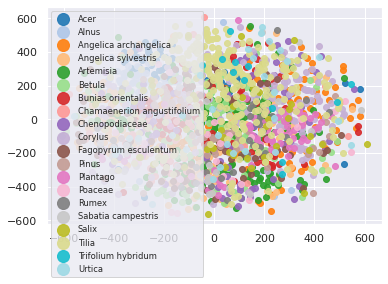

<Figure size 2160x2160 with 0 Axes>

In [ ]:
from matplotlib import cm

fig = plt.figure()
plt.figure(figsize=(30,30))

ax = fig.add_subplot(111)
num_categories = 20
cmap = cm.get_cmap('tab20')
# ax.scatter(x, y, z, c=target, cmap='Spectral')
for lab in range(num_categories):
    indices = target==english_to_latin[str(lab)]
    ax.scatter(X_embedded[indices, 0], X_embedded[indices, 1],
               c=np.array(cmap(lab)).reshape(1,4),
               label = cats[lab],
               alpha=0.9, cmap=cmap)
ax.legend(fontsize='small', markerscale=2)
plt.show()

In [378]:
tsne_model = TSNE(n_components=3,verbose=1, perplexity=40, n_iter=5000, learning_rate=1000)

# X = preprocessing.normalize(X)
X_encode = np.array(X_encode)

X = preprocessing.normalize(X_encode, norm='l2')
# X = np.array(X)

X_embedded = tsne_model.fit_transform(X)
X_embedded.shape

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1801 samples in 0.001s...
[t-SNE] Computed neighbors for 1801 samples in 0.153s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1801
[t-SNE] Computed conditional probabilities for sample 1801 / 1801
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 131.267151
[t-SNE] KL divergence after 5000 iterations: 2.382791


(1801, 3)

In [379]:
x = X_embedded[:, 0]
y = X_embedded[:, 1]
z = X_embedded[:, 2]

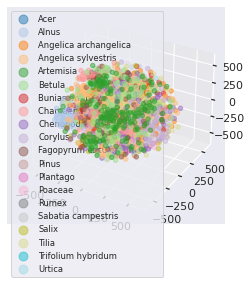

In [380]:
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
num_categories = 20
cmap = cm.get_cmap('tab20')
# ax.scatter(x, y, z, c=target, cmap='Spectral')
for lab in range(num_categories):
    indices = target==english_to_latin[str(lab)]
    ax.scatter(x[indices], y[indices], z[indices],
               c=np.array(cmap(lab)).reshape(1,4),
               label = cats[lab],
               alpha=0.5, cmap='Spectral')
ax.legend(fontsize='small', markerscale=2)
plt.show()

In [381]:
tsne_model = TSNE(n_components=2,verbose=1, perplexity=40, n_iter=5000, learning_rate=1000)

# X = preprocessing.normalize(X)
X_encode = np.array(X_encode)

X = preprocessing.normalize(X_encode, norm='l2')
# X = np.array(X)

X_embedded = tsne_model.fit_transform(X)
X_embedded.shape

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1801 samples in 0.001s...
[t-SNE] Computed neighbors for 1801 samples in 0.126s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1801
[t-SNE] Computed conditional probabilities for sample 1801 / 1801
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.993828
[t-SNE] KL divergence after 1800 iterations: 0.806238


(1801, 2)

In [382]:
x = np.sin(X_embedded[:, 0]) * np.cos(X_embedded[:, 1])
y = np.sin(X_embedded[:, 0]) * np.sin(X_embedded[:, 1])
z = np.cos(X_embedded[:, 0])

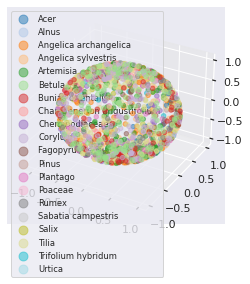

In [383]:
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
num_categories = 20
cmap = cm.get_cmap('tab20')
# ax.scatter(x, y, z, c=target, cmap='Spectral')
for lab in range(num_categories):
    indices = target==english_to_latin[str(lab)]
    ax.scatter(x[indices], y[indices], z[indices],
               c=np.array(cmap(lab)).reshape(1,4),
               label = cats[lab],
               alpha=0.5, cmap='Spectral')
ax.legend(fontsize='small', markerscale=2)
plt.show()

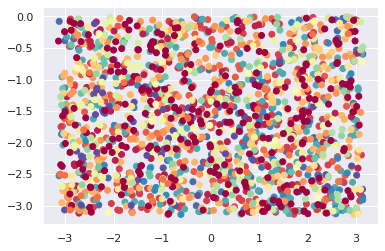

In [384]:
x = np.arctan2(x, y)
y = -np.arccos(z)
plt.scatter(x, y, c=[di[t] for t in target], cmap='Spectral')


In [12]:
from matplotlib import cm
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_encode)
pca_proj = pca.transform(X_encode)
pca.explained_variance_ratio_

array([0.76610406, 0.06920548])

In [13]:
english_to_latin['0'] == target

array([ True,  True,  True, ..., False, False, False])

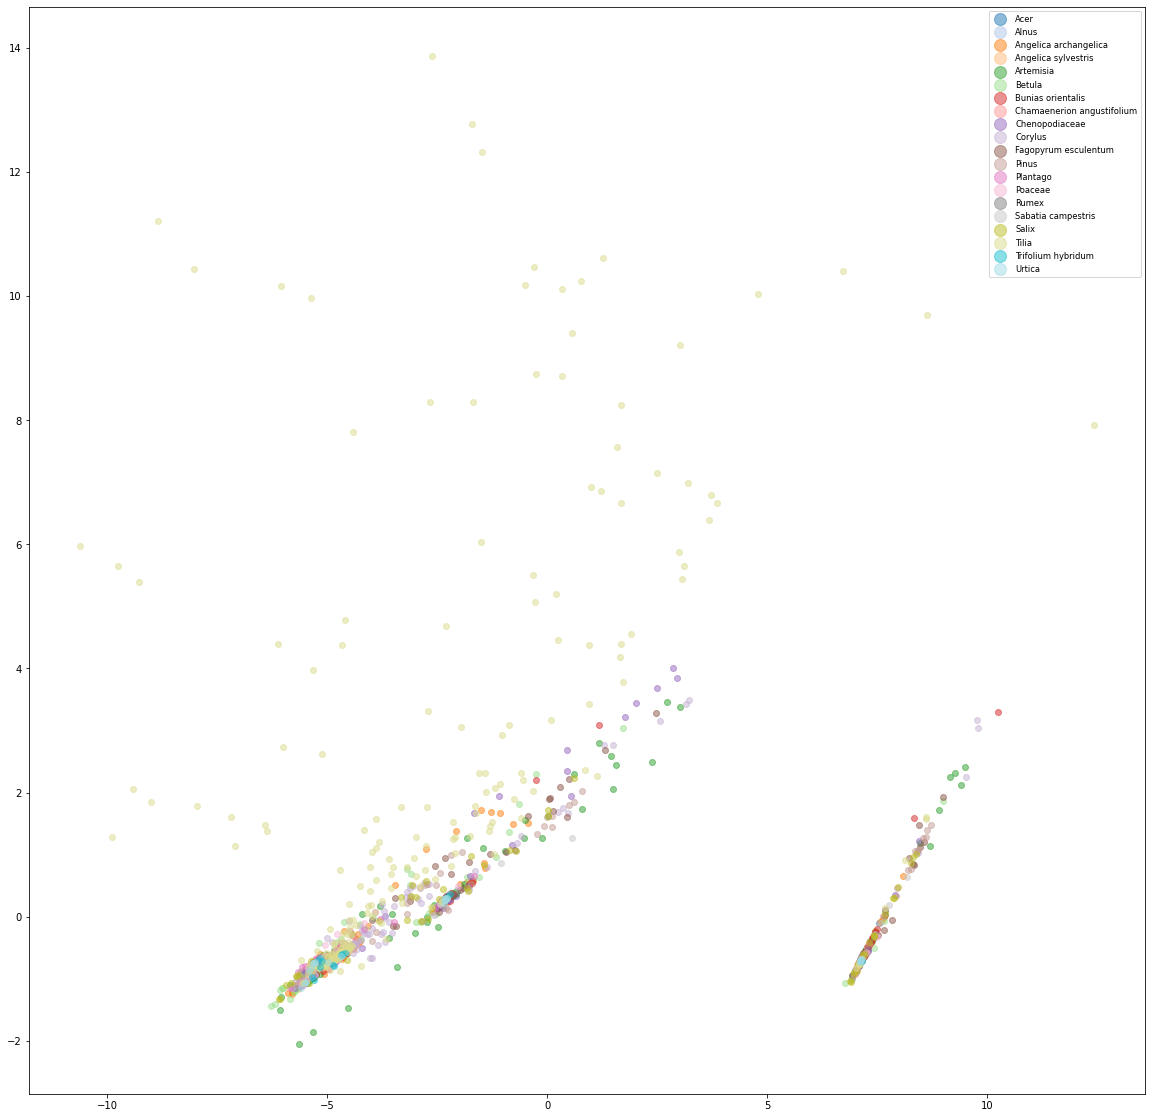

In [14]:
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(20,20))
num_categories = 20
for lab in range(num_categories):
    indices = target==english_to_latin[str(lab)]
    ax.scatter(pca_proj[indices,0],pca_proj[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = cats[lab] ,alpha=0.5)
ax.legend(fontsize='small', markerscale=2)
plt.show()

In [273]:
pca = PCA(n_components=3)
pca.fit(X_encode)
pca_proj = pca.transform(X_encode)
pca.explained_variance_ratio_

array([0.77219554, 0.06069806, 0.03910153])

In [276]:
pca_proj = np.array(pca_proj)
pca_proj.shape

(1801, 3)

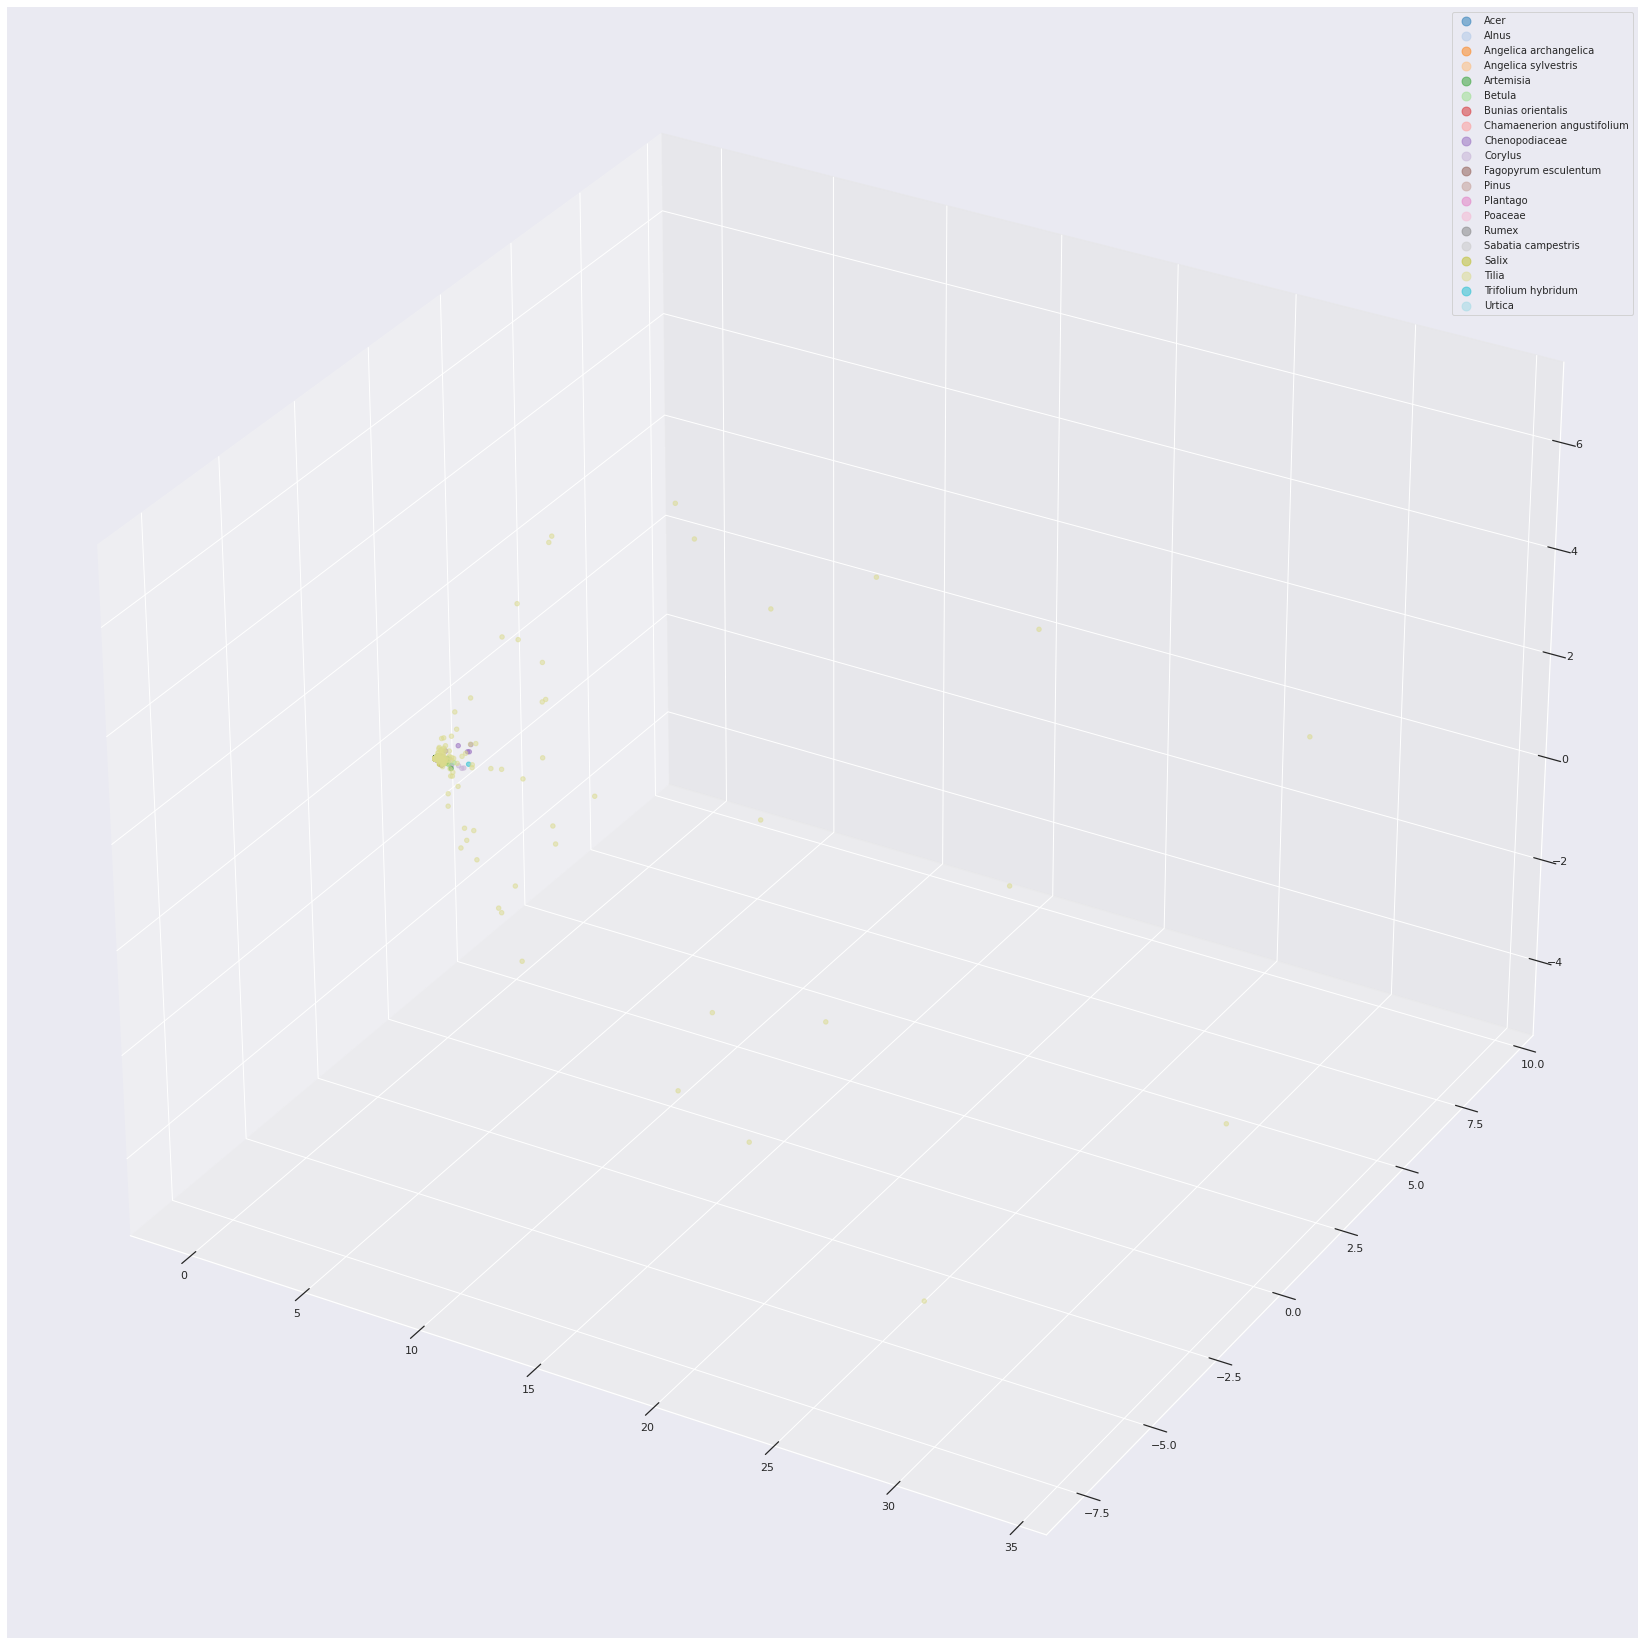

In [278]:
# fig, ax = plt.subplots(figsize=(20,20), projection='3d')
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

num_categories = 20
for lab in range(num_categories):
    indices = target==english_to_latin[str(lab)]
    ax.scatter(pca_proj[indices,0],
               pca_proj[indices,1],
               pca_proj[indices,2], 
               c=np.array(cmap(lab)).reshape(1,4),
               label = cats[lab],
               alpha=0.5)
ax.legend(fontsize='small', markerscale=2)
plt.show()

# cmap = cm.get_cmap('tab20')
# num_categories = 10
# for lab in range(num_categories):
#     indices = test_predictions == lab
#     ax.scatter(tsne_proj[indices, 0],
#                tsne_proj[indices, 1],
#                tsne_proj[indices, 2],
#                c=np.array(cmap(lab)).reshape(1, 4),
#                label=lab,
#                alpha=0.5)
# ax.legend(fontsize='large', markerscale=2)
# plt.show()

In [17]:
import umap
import umap.plot
import seaborn as sns

In [18]:
sns.set(palette=sns.color_palette("tab20", 20), rc={'figure.figsize':(30,30)})


In [25]:
X = preprocessing.normalize(X_encode, norm='l2')
X = X_encode
mapper = umap.UMAP(n_neighbors=50,
        min_dist=0.99,
        n_components=2,
        metric='cosine').fit(X)

<AxesSubplot:>

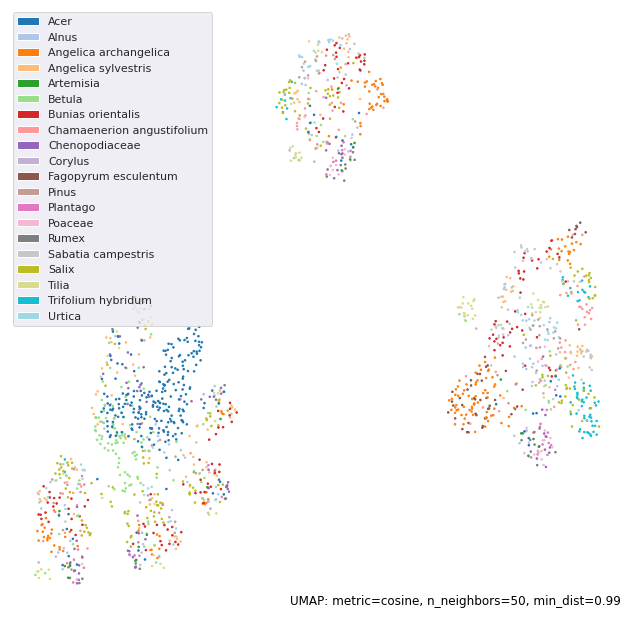

In [27]:
umap.plot.points(mapper, labels=target, color_key_cmap='tab20', background='white', show_legend=True)

In [341]:
# X = preprocessing.normalize(X_encode, norm='l2')
X = X_encode
# mapper = umap.UMAP(n_neighbors=50,
#         min_dist=0.99,
#         n_components=2,
#         metric='euclidean').fit(X)
sphere_mapper = umap.UMAP(output_metric='haversine', n_neighbors=50,
        min_dist=0.99,random_state=42).fit(X)

In [342]:
x = np.sin(sphere_mapper.embedding_[:, 0]) * np.cos(sphere_mapper.embedding_[:, 1])
y = np.sin(sphere_mapper.embedding_[:, 0]) * np.sin(sphere_mapper.embedding_[:, 1])
z = np.cos(sphere_mapper.embedding_[:, 0])

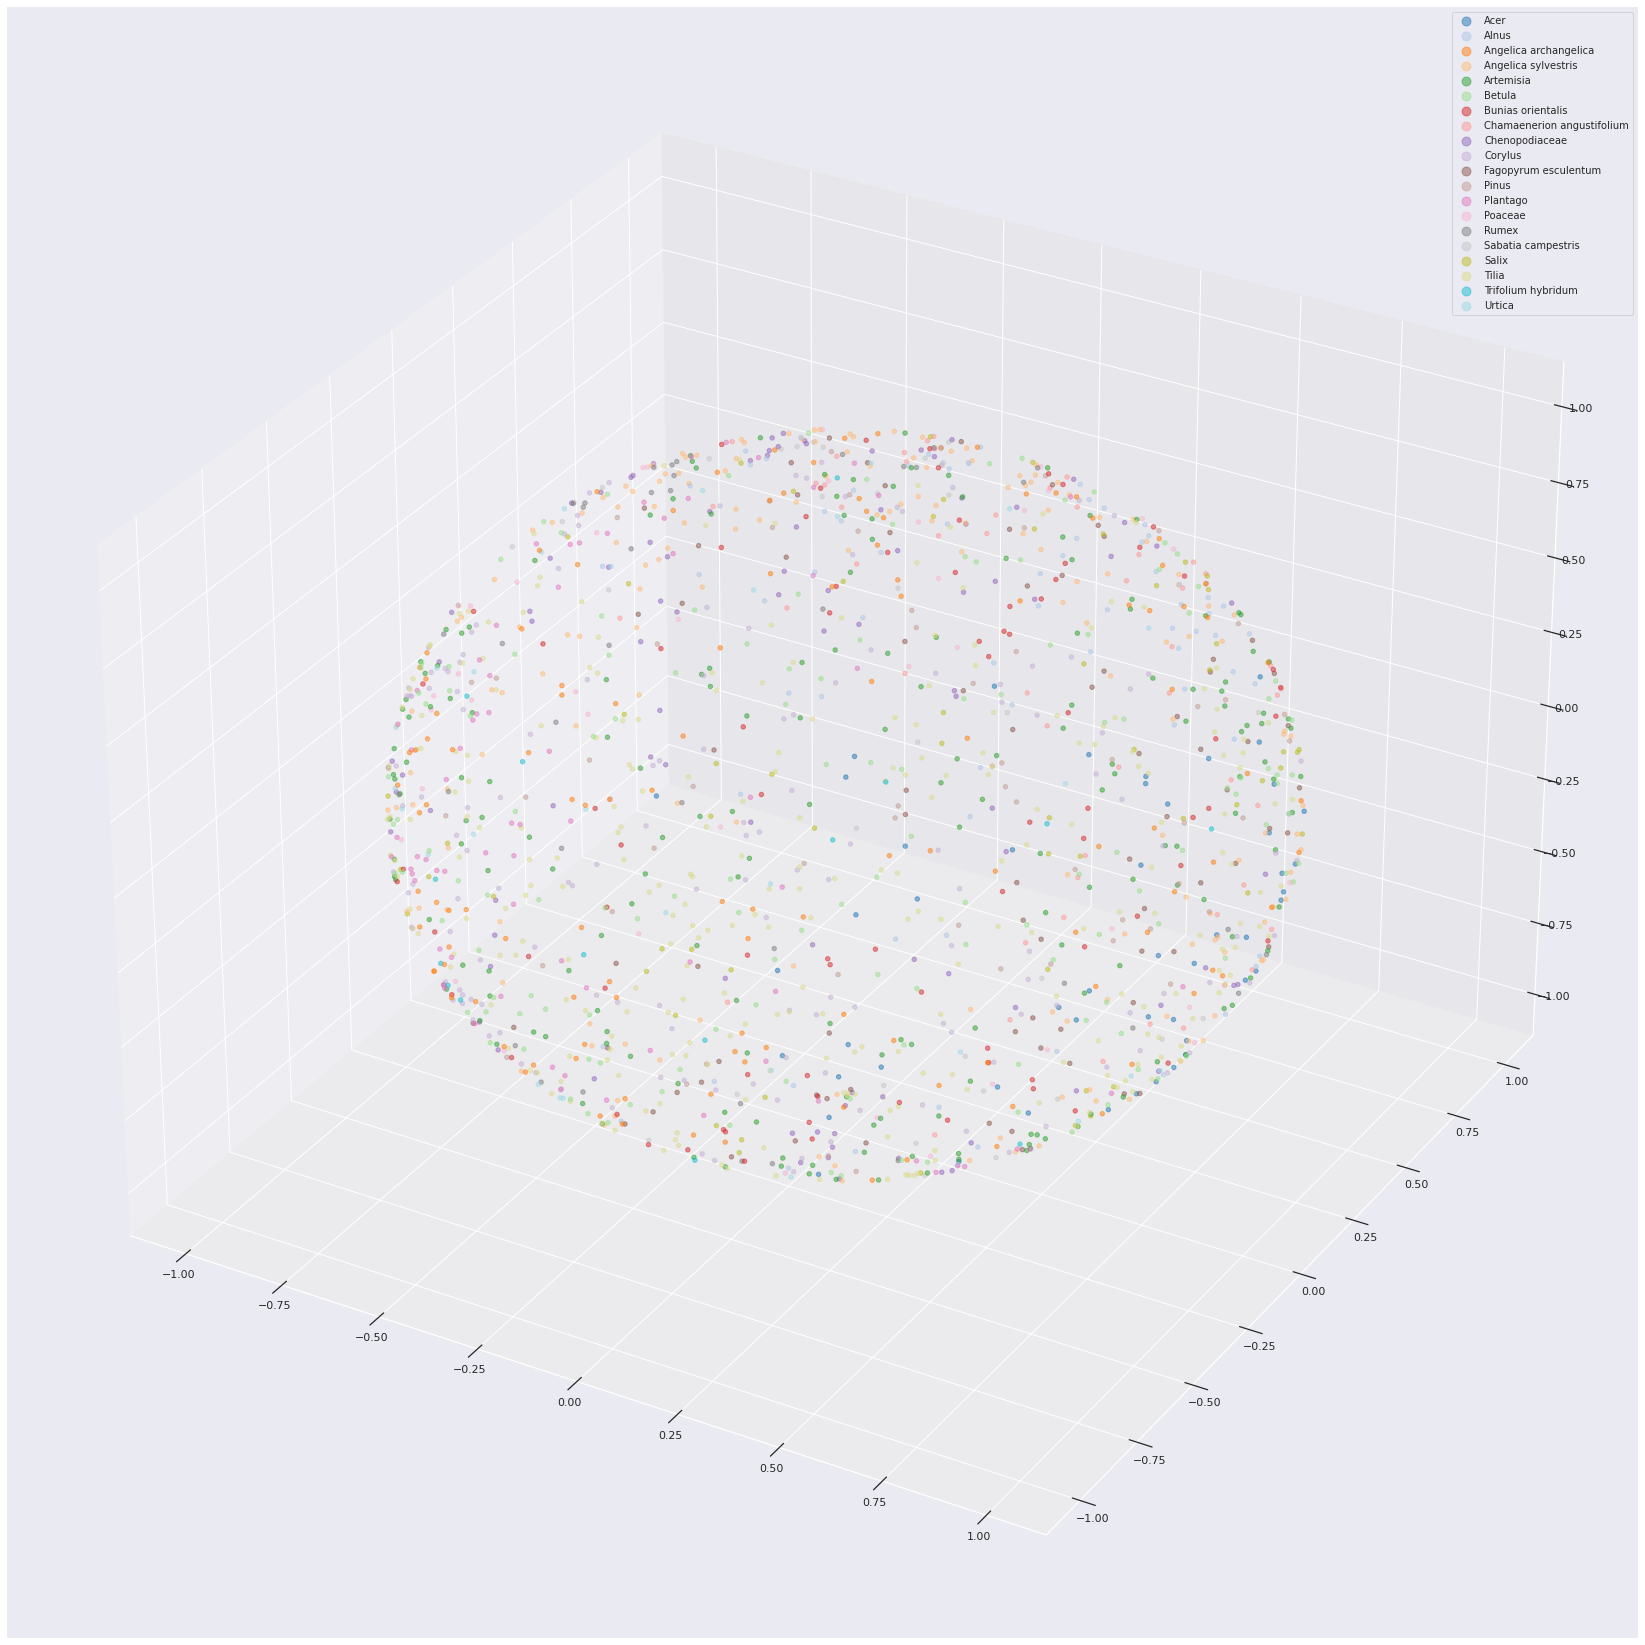

In [343]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x, y, z, c=target, cmap='Spectral')
for lab in range(num_categories):
    indices = target==english_to_latin[str(lab)]
    ax.scatter(x[indices], y[indices], z[indices],
               c=np.array(cmap(lab)).reshape(1,4),
               label = cats[lab],
               alpha=0.5, cmap='Spectral')
ax.legend(fontsize='small', markerscale=2)
plt.show()

In [301]:
x = np.arctan2(x, y)
y = -np.arccos(z)

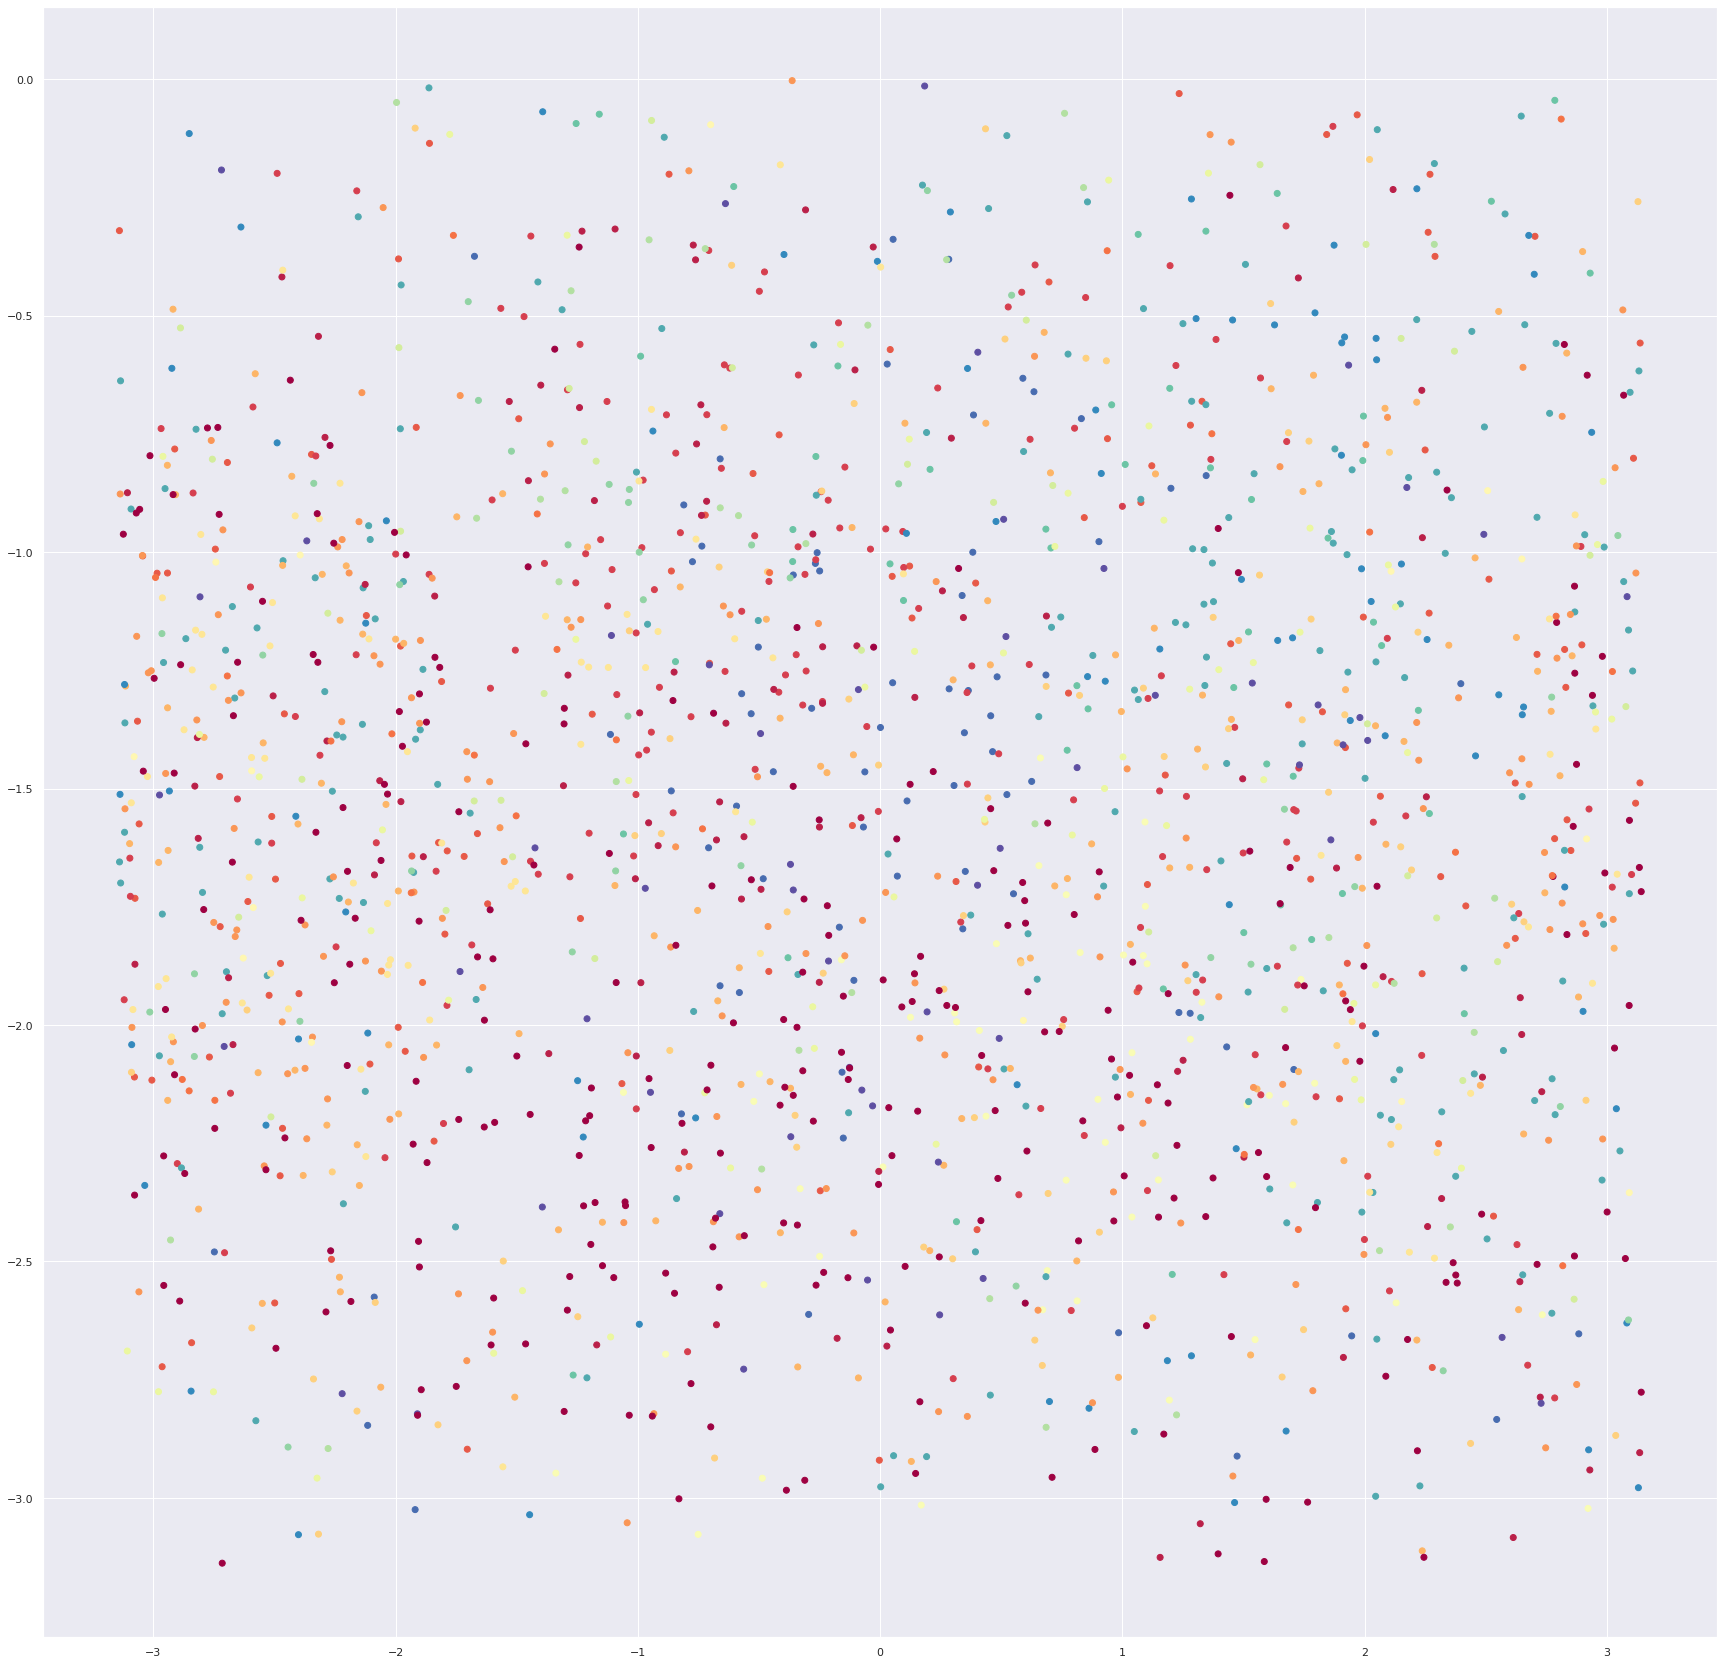

In [303]:
plt.scatter(x, y, c=[di[t] for t in target], cmap='Spectral')


In [ ]:

cats = np.unique(target)
di = dict(zip(cats,np.arange(len(cats))))

In [302]:
di

{'Acer': 0,
 'Alnus': 1,
 'Angelica archangelica': 2,
 'Angelica sylvestris': 3,
 'Artemisia': 4,
 'Betula': 5,
 'Bunias orientalis': 6,
 'Chamaenerion angustifolium': 7,
 'Chenopodiaceae': 8,
 'Corylus': 9,
 'Fagopyrum esculentum': 10,
 'Pinus': 11,
 'Plantago': 12,
 'Poaceae': 13,
 'Rumex': 14,
 'Sabatia campestris': 15,
 'Salix': 16,
 'Tilia': 17,
 'Trifolium hybridum': 18,
 'Urtica': 19}

<AxesSubplot:title={'center':'Colored by RGB coords of PCA embedding'}>

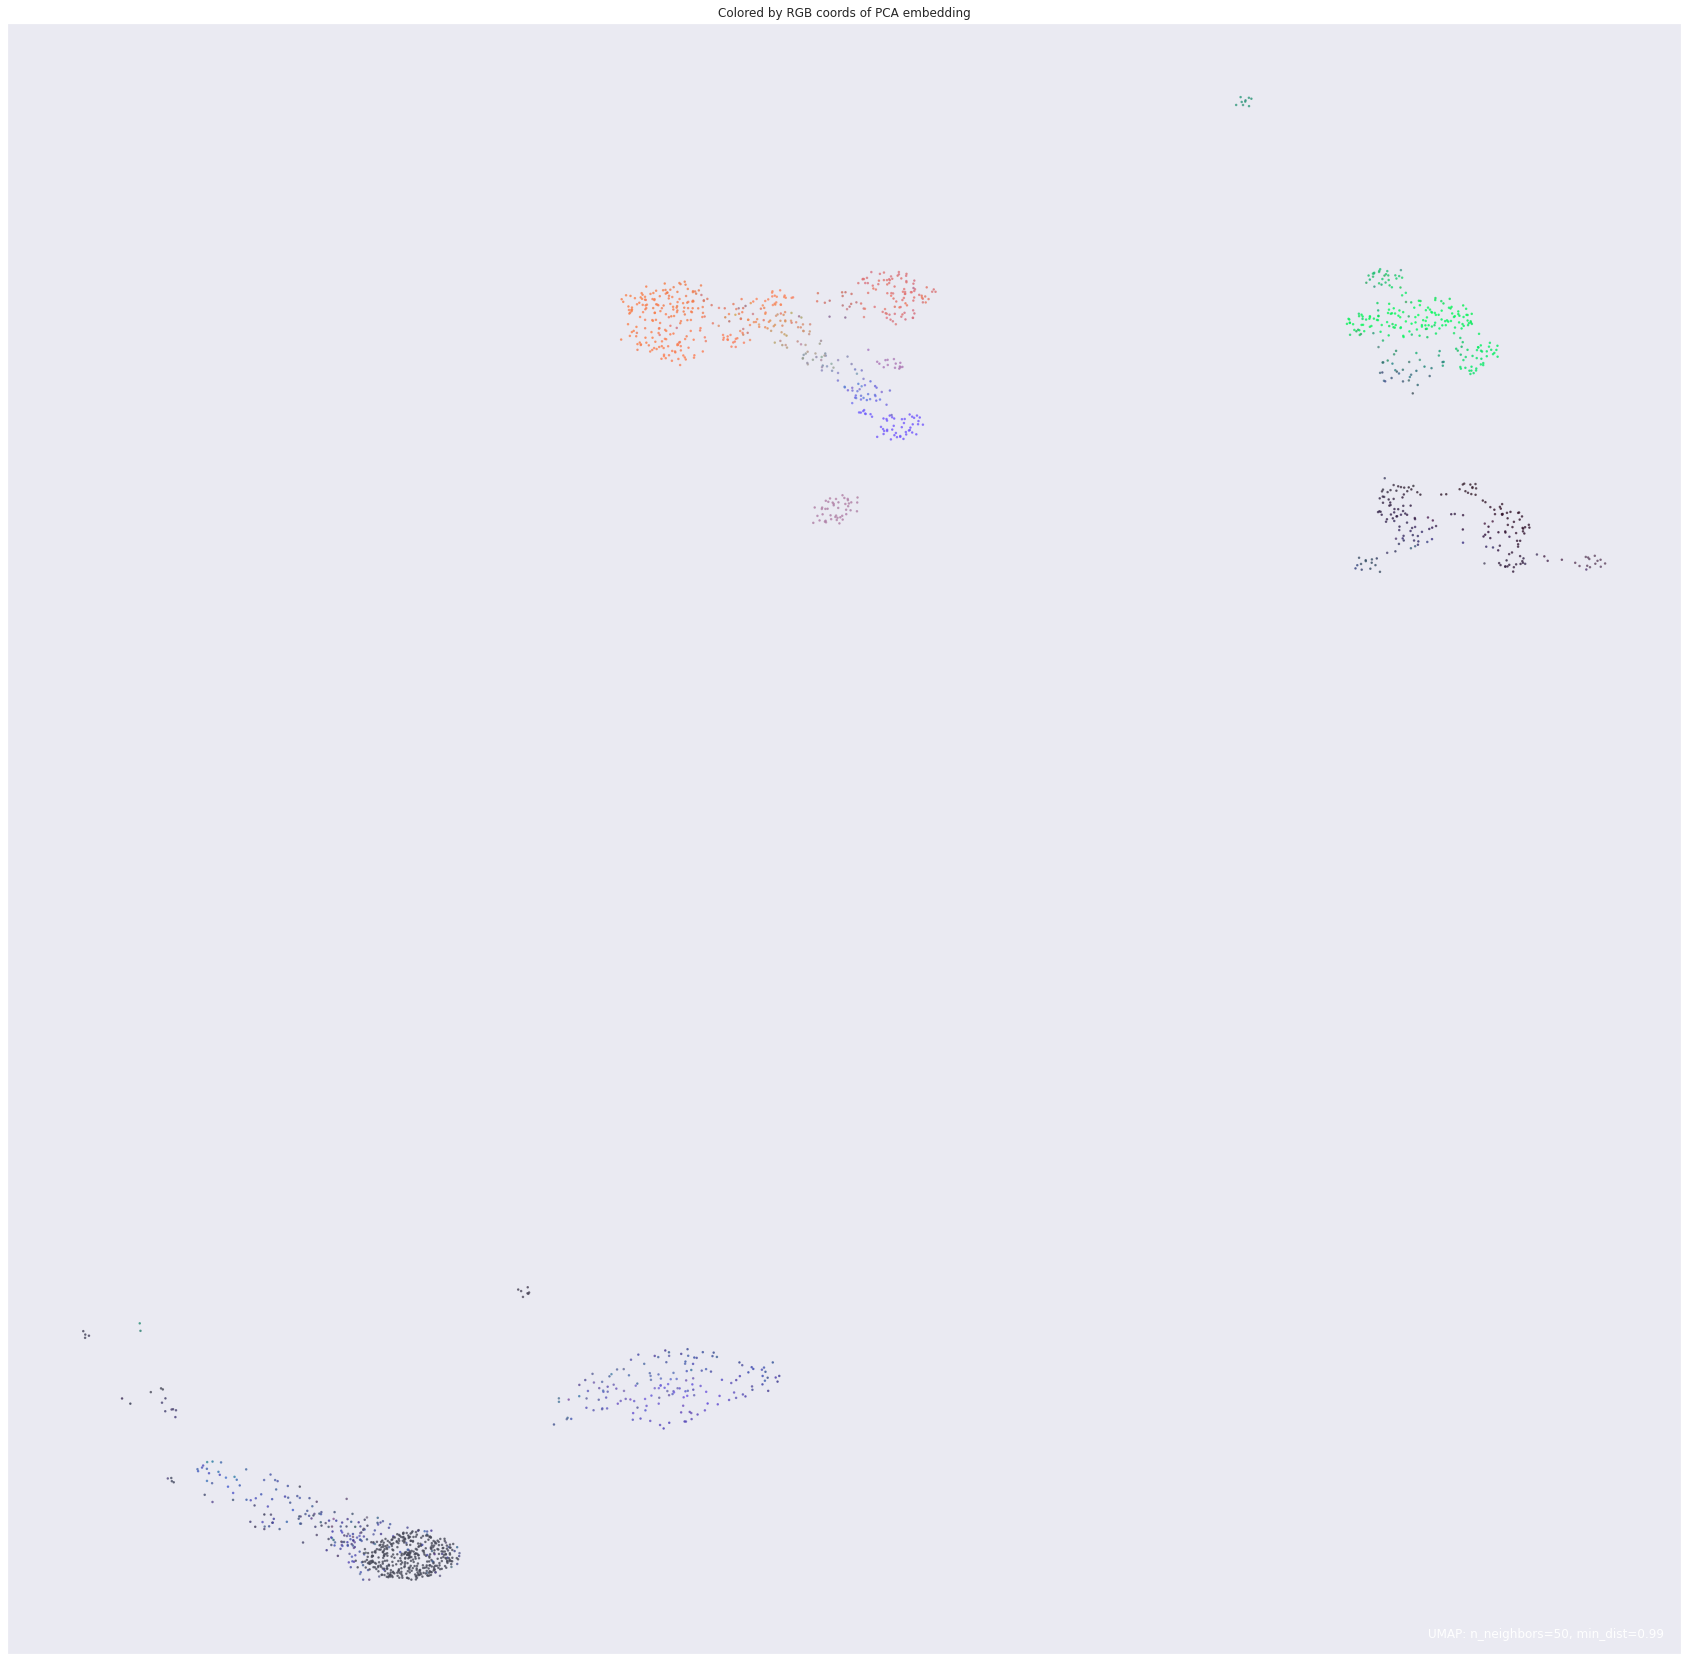

In [263]:
umap.plot.diagnostic(mapper, diagnostic_type='pca', background='black')


<AxesSubplot:title={'center':'Colored by RGB coords of Vector Quantization'}>

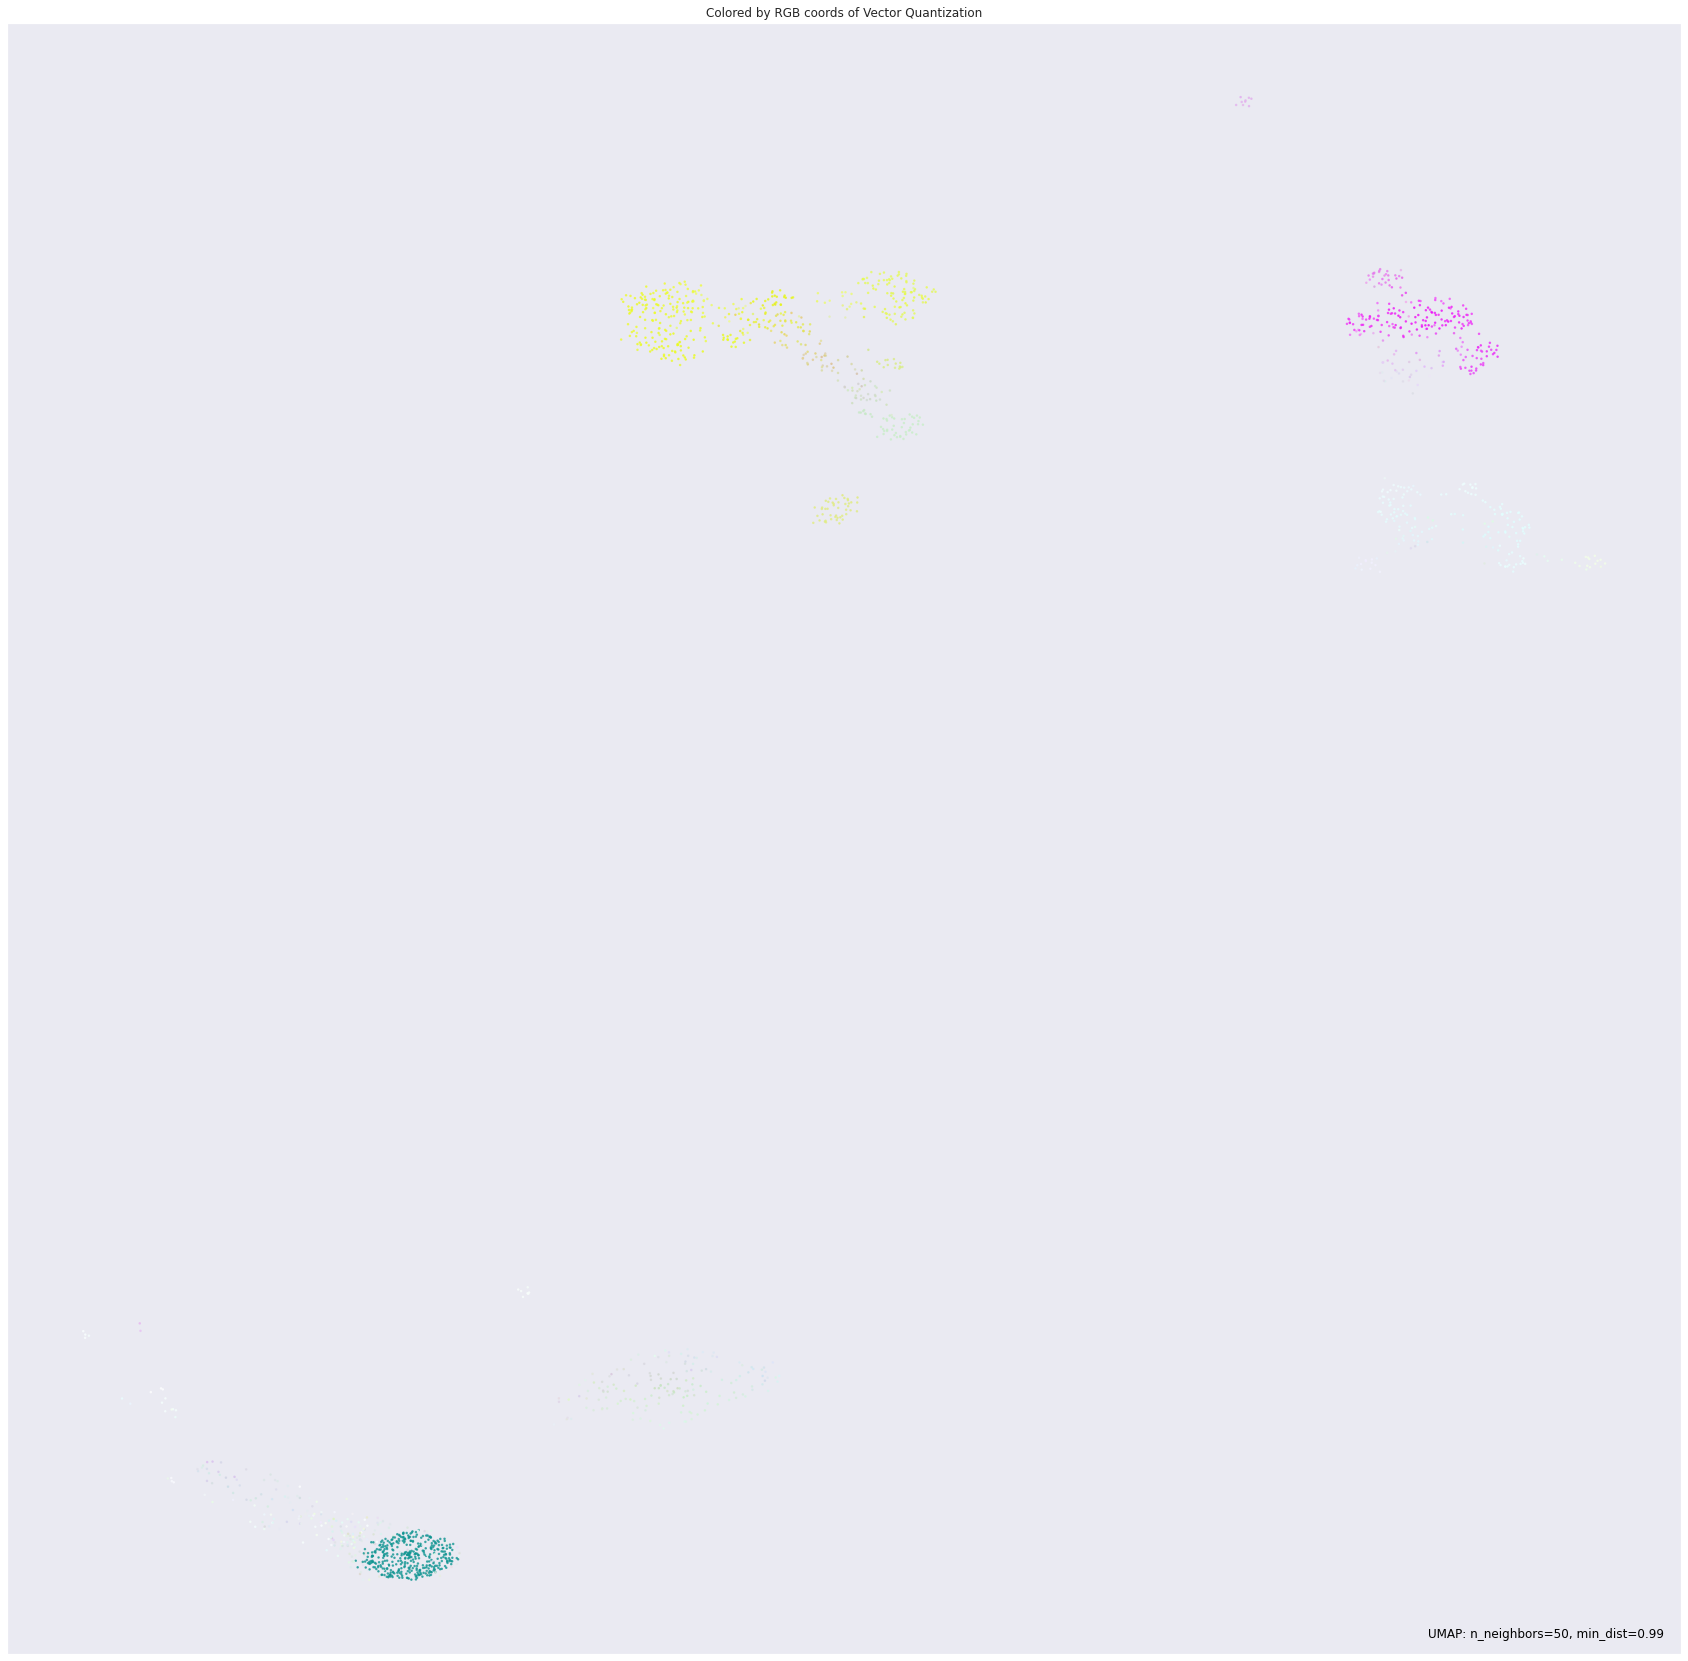

In [279]:
umap.plot.diagnostic(mapper, diagnostic_type='vq')